<a href="https://colab.research.google.com/github/kingarbaz/kingarbaz/blob/main/30082022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fashion_mnist=keras.datasets.fashion_mnist

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_images)

60000

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_images)

10000

PREPROCESS OF DATA


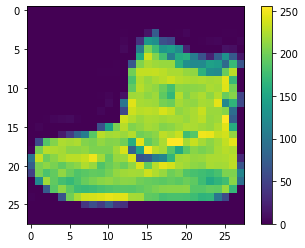

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
train_images=train_images/255.0
test_images=test_images/2550.0

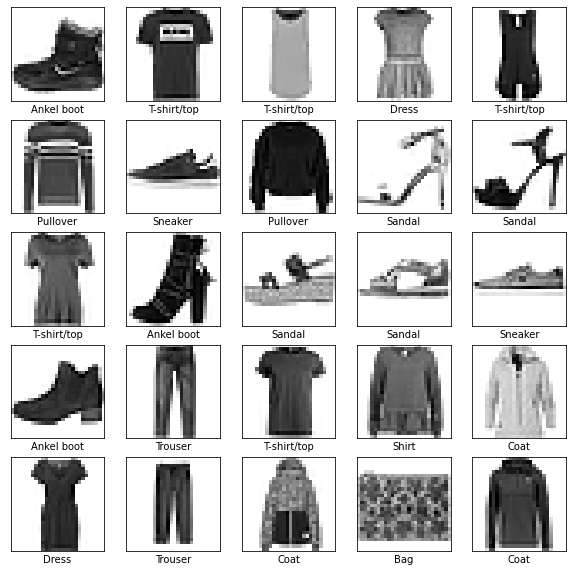

In [14]:
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

BUILD THE MODEL


In [18]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])

COMPILE THE MODEL


In [19]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

TRAIN THE MODEL

In [21]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2309 - accuracy: 0.9139
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2245 - accuracy: 0.9155
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2180 - accuracy: 0.9186
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2104 - accuracy: 0.9212
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2057 - accuracy: 0.9219
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1985 - accuracy: 0.9254
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1956 - accuracy: 0.9258
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1926 - accuracy: 0.9279
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1850 - accuracy: 0.9311
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.18

TEST OR EVALUATE THE MODEL


In [24]:
test_loss, test_acc=model.evaluate(test_images, test_labels, verbose=2)
print('\n Test Accuracy: ', test_acc)

313/313 - 3s - loss: 1.4918 - accuracy: 0.4794 - 3s/epoch - 9ms/step

 Test Accuracy:  0.47940000891685486


MAKE A PREDICTION

In [28]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [29]:
predictions=probability_model.predict(test_images)

In [30]:
predictions[0]

array([1.3212354e-03, 2.3204309e-05, 2.9875230e-04, 2.7481906e-04,
       7.7869155e-04, 9.4939989e-01, 7.2329268e-03, 3.8759585e-02,
       4.4314528e-04, 1.4677775e-03], dtype=float32)

In [33]:
def plot_image(i, prediction_array, true_label, img):
  true_label,img=true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label=np.argmax(prediction_array)
  if predicted_label==true_label:
    color='blue'
  else:
    color='red'
  plt.xlabel("{} {:2.0f}%({}))", format(class_names[predicted_label], 1000))